In [1]:
# Import TensorFlow and relevant libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
pip install protobuf==5.28.3

In [7]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [3]:
# Define the paths to the training and testing data directories
train_data_dir = r"C:\Users\Jayesh Mahajan\Desktop\Dl\mnist-jpg 23\train"
test_data_dir = r"C:\Users\Jayesh Mahajan\Desktop\Dl\mnist-jpg 23\test"

In [4]:
# Set up an ImageDataGenerator to rescale pixel values to [0, 1]
image_data_generator = ImageDataGenerator(rescale=1.0/255)

# Define batch sizes
train_batch_size = 10000
test_batch_size = 5000

# Create data generators for training and testing
train_generator = image_data_generator.flow_from_directory(
    train_data_dir,
    target_size=(28, 28),  # Resize images to 28x28 pixels
    batch_size=train_batch_size,  # Number of images per training batch
    class_mode='categorical',  # One-hot encoded labels
    color_mode='grayscale',  # Convert images to grayscale
    shuffle=True,  # Shuffle the order of images during training
)

test_generator = image_data_generator.flow_from_directory(
    test_data_dir,
    target_size=(28, 28),  # Resize images to 28x28 pixels
    batch_size=test_batch_size,  # Number of images per testing batch
    class_mode='categorical',  # One-hot encoded labels
    color_mode='grayscale',  # Convert images to grayscale
    shuffle=True,  # Shuffle the order of images during testing
)

Found 60000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.


In [5]:
x_train, y_train = train_generator[0]
x_test, y_test = test_generator[0]

In [8]:
print(f"Shape of X_train {x_train.shape}")
print(f"Shape of y_train {y_train.shape}")
print(f"Shape of x_test  {x_test.shape}")
print(f"Shape of y_test  {y_test.shape}")

Shape of X_train (10000, 28, 28, 1)
Shape of y_train (10000, 10)
Shape of x_test  (5000, 28, 28, 1)
Shape of y_test  (5000, 10)


In [9]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50,activation='relu',name='L1'),
    keras.layers.Dense(50,activation='relu',name='L2'),
    keras.layers.Dense(10,activation='softmax',name='L3')
])

C:\Users\Jayesh Mahajan\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), batch_size=10, shuffle=True)

Epoch 1/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7010 - loss: 1.0741 - val_accuracy: 0.8672 - val_loss: 0.4813
Epoch 2/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8813 - loss: 0.4069 - val_accuracy: 0.8950 - val_loss: 0.3627
Epoch 3/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9069 - loss: 0.3217 - val_accuracy: 0.9074 - val_loss: 0.3132
Epoch 4/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9200 - loss: 0.2764 - val_accuracy: 0.9156 - val_loss: 0.2914
Epoch 5/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9302 - loss: 0.2446 - val_accuracy: 0.9152 - val_loss: 0.2879
Epoch 6/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9389 - loss: 0.2183 - val_accuracy: 0.9176 - val_loss: 0.2893
Epoch 7/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9435 - loss: 0.2003 - val_accuracy: 0.9286 - val_loss: 0.2574
Epoch 8/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9483 - loss: 0.1821 - 

<Axes: >

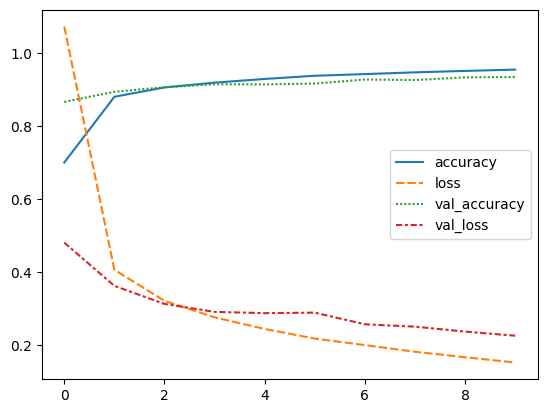

In [11]:
import seaborn as sns
sns.lineplot(model.history.history)

In [12]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Loss: ", test_loss)
print("Accuracy: ", test_acc)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9354 - loss: 0.2261
Loss:  0.22605939209461212
Accuracy:  0.9354000091552734


157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


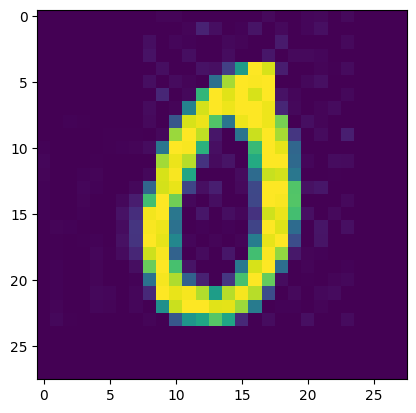

0


In [13]:
predicted_value=model.predict(x_test)
plt.imshow(x_test[15])
plt.show()
print(np.argmax(predicted_value[15], axis=0))